In [1]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
from shapely.geometry import Point
from dateutil.relativedelta import relativedelta

In [2]:
INMET = gpd.read_file('../INMET/metadata/metadata_INMET_v7.csv')

In [3]:
INMET

,field_1,region,uf,estacion,codigo_wmo,lat,lon,altitude,fecha_fundacion,path_file,nameFull,origen,fechMinFile,fechMaxFile,fechMinData,fechMaxData,periodicidad,actualizacion,activo,geometry
0,0,N,AM,MANAUS,A101,"-3,10333333","-60,01638888","61,25",2000-05-09,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_N_AM_A101_MANAUS_09-05-2000_A_31-12-2000...,INMET,01-01-2004,31-12-2019,2000-05-09,2020-07-31,"{'2000': (5664, 5688), '2001': (8736, 8760), '...",Mensual,True,None
1,0,S,RS,PORTO ALEGRE,A801,"-30,05","-51,16666666","46,97",2000-09-22,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_S_RS_A801_PORTO ALEGRE_22-09-2000_A_31-1...,INMET,01-01-2004,31-12-2019,2000-09-22,2020-07-31,"{'2000': (2400, 2424), '2001': (8736, 8760), '...",Mensual,True,None
2,0,NE,BA,SALVADOR,A401,"-13,01666666","-38,51666666","51,41",2000-05-13,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_NE_BA_A401_SALVADOR_13-05-2000_A_31-12-2...,INMET,01-01-2004,31-12-2019,2000-05-13,2020-07-31,"{'2000': (5568, 5592), '2001': (8736, 8760), '...",Mensual,True,None
3,0,SE,RJ,ECOLOGIA AGRICOLA,A601,"-22,8","-43,68333333",33,2000-05-07,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_SE_RJ_A601_ECOLOGIA AGRICOLA_07-05-2000_...,INMET,01-01-2004,31-12-2019,2000-05-07,2020-07-31,"{'2000': (5712, 5736), '2001': (8736, 8760), '...",Mensual,True,None
4,0,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_CO_DF_A001_BRASILIA_07-05-2000_A_31-12-2...,INMET,01-01-2004,31-12-2019,2000-05-07,2020-07-31,"{'2000': (5712, 5736), '2001': (8736, 8760), '...",Mensual,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,N,AP,PORTO GRANDE,A244,",69444444","-51,40416666",84,17/09/08,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_N_AP_A244_PORTO GRANDE_01-01-2019_A_31-1...,INMET,01-01-2019,31-12-2019,2019-01-01,2020-07-31,"{'2019': (8736, 8760), '2020': (5088, 5112)}",Mensual,True,None
606,0,CO,MT,ROSARIO OESTE,A944,"-14,82888888","-56,44194444",195,30/05/19,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_CO_MT_A944_ROSARIO OESTE_30-05-2019_A_31...,INMET,01-01-2019,31-12-2019,2019-05-30,2020-07-31,"{'2019': (5160, 5184), '2020': (5088, 5112)}",Mensual,True,None
607,0,NE,PI,ANGICAL DO PIAUI,A377,"-6,08944444","-42,72749999",183,14/11/19,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_NE_PI_A377_ANGICAL DO PIAUI_14-11-2019_A...,INMET,01-01-2019,31-12-2019,2019-11-14,2020-07-31,"{'2019': (1128, 1152), '2020': (5088, 5112)}",Mensual,True,None
608,0,S,PR,GOIOERE,A825,"-24,15833333","-53,03055554","452,34",19/10/06,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_S_PR_A825_GOIOERE_01-01-2019_A_31-12-201...,INMET,01-01-2019,31-12-2019,2019-01-01,2020-07-31,"{'2019': (8736, 8760), '2020': (5088, 5112)}",Mensual,True,None


In [7]:
def convert_to_point(row):
    lon = float(row['lon'].replace(',','.'))
    lat = float(row['lat'].replace(',','.'))
    return Point(lon, lat)

INMET['geometry'] = INMET.apply(lambda row: convert_to_point(row), axis=1)

<AxesSubplot:>

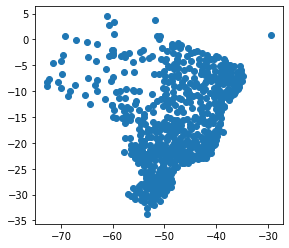

In [18]:
INMET.plot()

In [19]:
INMET.head()

,field_1,region,uf,estacion,codigo_wmo,lat,lon,altitude,fecha_fundacion,path_file,nameFull,origen,fechMinFile,fechMaxFile,fechMinData,fechMaxData,periodicidad,actualizacion,activo,geometry
0,0,N,AM,MANAUS,A101,"-3,10333333","-60,01638888","61,25",2000-05-09,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_N_AM_A101_MANAUS_09-05-2000_A_31-12-2000...,INMET,01-01-2004,31-12-2019,2000-05-09,2020-07-31,"{'2000': (5664, 5688), '2001': (8736, 8760), '...",Mensual,True,POINT (-60.01639 -3.10333)
1,0,S,RS,PORTO ALEGRE,A801,"-30,05","-51,16666666","46,97",2000-09-22,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_S_RS_A801_PORTO ALEGRE_22-09-2000_A_31-1...,INMET,01-01-2004,31-12-2019,2000-09-22,2020-07-31,"{'2000': (2400, 2424), '2001': (8736, 8760), '...",Mensual,True,POINT (-51.16667 -30.05000)
2,0,NE,BA,SALVADOR,A401,"-13,01666666","-38,51666666","51,41",2000-05-13,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_NE_BA_A401_SALVADOR_13-05-2000_A_31-12-2...,INMET,01-01-2004,31-12-2019,2000-05-13,2020-07-31,"{'2000': (5568, 5592), '2001': (8736, 8760), '...",Mensual,True,POINT (-38.51667 -13.01667)
3,0,SE,RJ,ECOLOGIA AGRICOLA,A601,"-22,8","-43,68333333",33,2000-05-07,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_SE_RJ_A601_ECOLOGIA AGRICOLA_07-05-2000_...,INMET,01-01-2004,31-12-2019,2000-05-07,2020-07-31,"{'2000': (5712, 5736), '2001': (8736, 8760), '...",Mensual,True,POINT (-43.68333 -22.80000)
4,0,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,/home/wally/Documents/Proyectos/GDM/Optimus/Cl...,INMET_CO_DF_A001_BRASILIA_07-05-2000_A_31-12-2...,INMET,01-01-2004,31-12-2019,2000-05-07,2020-07-31,"{'2000': (5712, 5736), '2001': (8736, 8760), '...",Mensual,True,POINT (-47.92583 -15.78944)


In [20]:
INMET['fechMinData'] = pd.to_datetime(INMET['fechMinData'], format='%Y-%m-%d')
INMET['fechMaxData'] = pd.to_datetime(INMET['fechMaxData'], format='%Y-%m-%d')

In [21]:
INMET['activo'] = None

def is_active(date):
    return date > (datetime.now() - relativedelta(months=6))

INMET['activo'] = INMET.apply(lambda row: is_active(row['fechMaxData']), axis=1)

In [22]:
AGRITEMPO = gpd.read_file('../AGRITEMPO/metadata/metadata_AGRITEMPO.csv')

In [23]:
AGRITEMPO

,field_1,Name,Start Date,End Date,Municipality,Latitude,Longitude,Altitude,State,geometry
0,0,EPITACIOLANDIA (Automatica),4/3/2011,4/26/2020,Epitaciolândia,-11.02,-68.73,225.00,AC,None
1,1,FEIJO (Automatica),4/3/2011,9/10/2020,Feijó,-8.14,-70.34,157.00,AC,None
2,2,RIO BRANCO,1/1/1958,9/10/2020,Rio Branco,-9.97,-67.80,135.00,AC,None
3,3,RIO BRANCO (Automatica),4/3/2011,3/12/2020,Rio Branco,-9.96,-68.17,226.00,AC,None
4,4,TARAUACA,11/1/1969,9/10/2020,Tarauacá,-8.17,-70.77,169.00,AC,None
...,...,...,...,...,...,...,...,...,...,...
35199,257,TRMM.8059,3/1/2000,9/8/2020,Augustinópolis,-5.50,-48.00,246.00,TO,None
35200,258,TRMM.8060,3/1/2000,9/8/2020,São Miguel do Tocantins,-5.50,-47.75,165.00,TO,None
35201,259,TRMM.8207,3/1/2000,9/8/2020,Esperantina,-5.25,-48.50,97.00,TO,None
35202,260,TRMM.8208,3/1/2000,9/8/2020,São Sebastião do Tocantins,-5.25,-48.25,102.00,TO,None


In [24]:
def convert_to_point(row):
    lon = float(row['Longitude'].replace(',','.'))
    lat = float(row['Latitude'].replace(',','.'))
    return Point(lon, lat)

AGRITEMPO['geometry'] = AGRITEMPO.apply(lambda row: convert_to_point(row), axis=1)

In [25]:
AGRITEMPO['geometry']

0        POINT (-68.73000 -11.02000)
1         POINT (-70.34000 -8.14000)
2         POINT (-67.80000 -9.97000)
3         POINT (-68.17000 -9.96000)
4         POINT (-70.77000 -8.17000)
                    ...             
35199     POINT (-48.00000 -5.50000)
35200     POINT (-47.75000 -5.50000)
35201     POINT (-48.50000 -5.25000)
35202     POINT (-48.25000 -5.25000)
35203     POINT (-48.00000 -5.25000)
Name: geometry, Length: 35204, dtype: geometry

<AxesSubplot:>

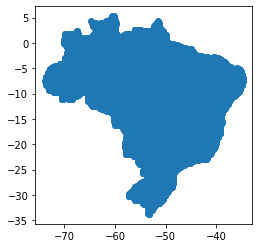

In [26]:
AGRITEMPO.plot()

<AxesSubplot:>

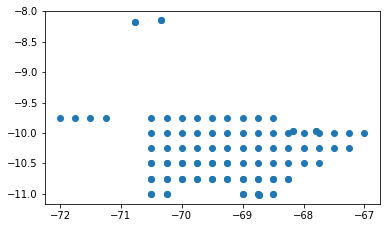

In [27]:
AGRITEMPO[0:100].plot()

In [28]:
AGRITEMPO[-4:]

,field_1,Name,Start Date,End Date,Municipality,Latitude,Longitude,Altitude,State,geometry
35200,258,TRMM.8060,3/1/2000,9/8/2020,São Miguel do Tocantins,-5.50,-47.75,165.00,TO,POINT (-47.75000 -5.50000)
35201,259,TRMM.8207,3/1/2000,9/8/2020,Esperantina,-5.25,-48.50,97.00,TO,POINT (-48.50000 -5.25000)
35202,260,TRMM.8208,3/1/2000,9/8/2020,São Sebastião do Tocantins,-5.25,-48.25,102.00,TO,POINT (-48.25000 -5.25000)
35203,261,TRMM.8209,3/1/2000,9/8/2020,Sampaio,-5.25,-48.00,230.00,TO,POINT (-48.00000 -5.25000)


<AxesSubplot:>

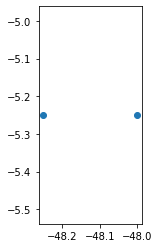

In [29]:
AGRITEMPO[-2:].plot()

In [30]:
def haversine(coord1, coord2):
    import math
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters)
    km = round(km, 3)
    print(f"Distance: {meters} m")
    print(f"Distance: {km} km")

In [31]:
AGRITEMPO['geometry'].iloc[-1].distance(AGRITEMPO['geometry'].iloc[-2])

0.25

In [32]:
haversine([x[0] for x in AGRITEMPO['geometry'].iloc[-1].coords.xy], [x[0] for x in AGRITEMPO['geometry'].iloc[-2].coords.xy])

Distance: 27682 m
Distance: 27.682 km


Estaciones no activas

In [33]:
INMET.shape

(610, 20)

In [34]:
AGRITEMPO.shape

(35204, 10)

In [35]:
AGRITEMPO.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35204 entries, 0 to 35203
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   field_1       35204 non-null  object  
 1   Name          35204 non-null  object  
 2   Start Date    35204 non-null  object  
 3   End Date      35204 non-null  object  
 4   Municipality  35204 non-null  object  
 5   Latitude      35204 non-null  object  
 6   Longitude     35204 non-null  object  
 7   Altitude      35204 non-null  object  
 8   State         35204 non-null  object  
 9   geometry      35204 non-null  geometry
dtypes: geometry(1), object(9)
memory usage: 2.7+ MB


In [36]:
AGRITEMPO['Start Date'] = pd.to_datetime(AGRITEMPO['Start Date'], format='%m/%d/%Y')
AGRITEMPO['End Date'] = pd.to_datetime(AGRITEMPO['End Date'], format='%m/%d/%Y')

In [37]:
AGRITEMPO['Active'] = None

def is_active(date):
    return date > (datetime.now() - relativedelta(months=6))

AGRITEMPO['Active'] = AGRITEMPO.apply(lambda row: is_active(row['End Date']), axis=1)

In [38]:
AGRITEMPO.head()

,field_1,Name,Start Date,End Date,Municipality,Latitude,Longitude,Altitude,State,geometry,Active
0,0,EPITACIOLANDIA (Automatica),2011-04-03,2020-04-26,Epitaciolândia,-11.02,-68.73,225.00,AC,POINT (-68.73000 -11.02000),True
1,1,FEIJO (Automatica),2011-04-03,2020-09-10,Feijó,-8.14,-70.34,157.00,AC,POINT (-70.34000 -8.14000),True
2,2,RIO BRANCO,1958-01-01,2020-09-10,Rio Branco,-9.97,-67.80,135.00,AC,POINT (-67.80000 -9.97000),True
3,3,RIO BRANCO (Automatica),2011-04-03,2020-03-12,Rio Branco,-9.96,-68.17,226.00,AC,POINT (-68.17000 -9.96000),False
4,4,TARAUACA,1969-11-01,2020-09-10,Tarauacá,-8.17,-70.77,169.00,AC,POINT (-70.77000 -8.17000),True


PLOTEO

<AxesSubplot:>

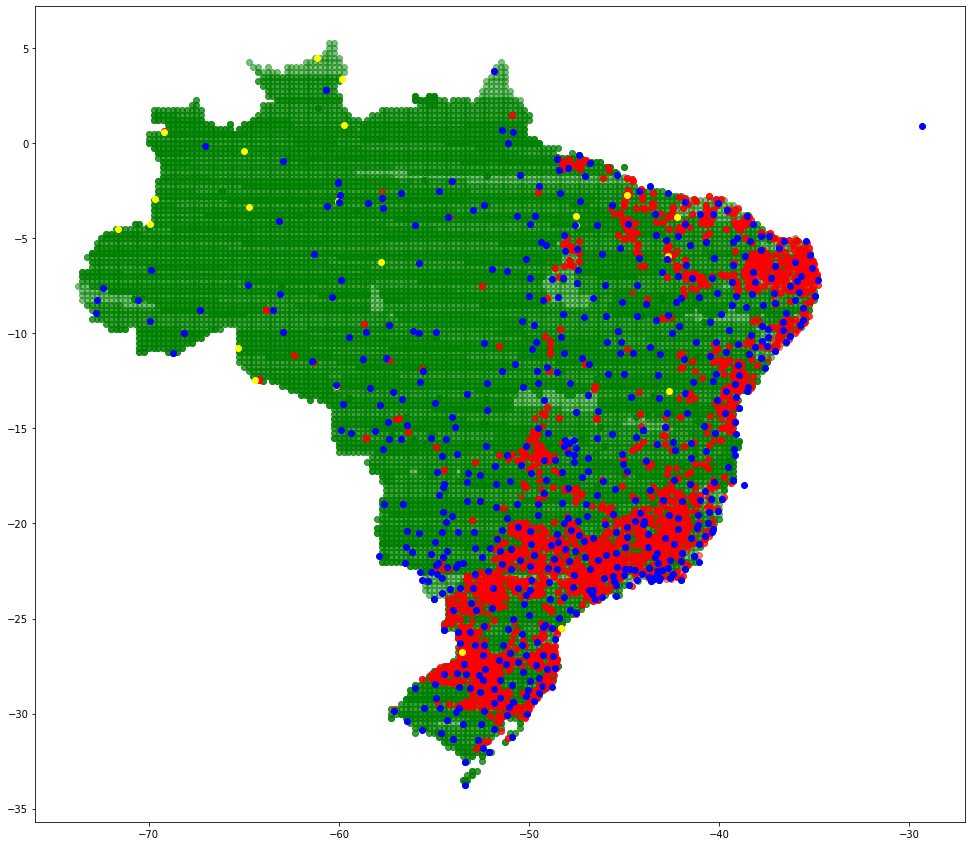

In [39]:
fig, ax = plt.subplots(figsize=(50, 15))

AGRITEMPO[AGRITEMPO['Active'] == True].plot(ax=ax, alpha=0.5, color='green')
AGRITEMPO[AGRITEMPO['Active'] == False].plot(ax=ax, alpha=0.5, color='red')
INMET[INMET['activo'] == False].plot(ax=ax, color='yellow')
INMET[INMET['activo'] == True].plot(ax=ax, color='blue')


In [40]:
real_stations = AGRITEMPO[~AGRITEMPO.Name.str.upper().str.startswith('TRMM')]

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Brasil = world[world['name'] == 'Brazil']

In [50]:
real_stations.shape

(1944, 11)

In [51]:
INMET.shape

(610, 20)

<AxesSubplot:>

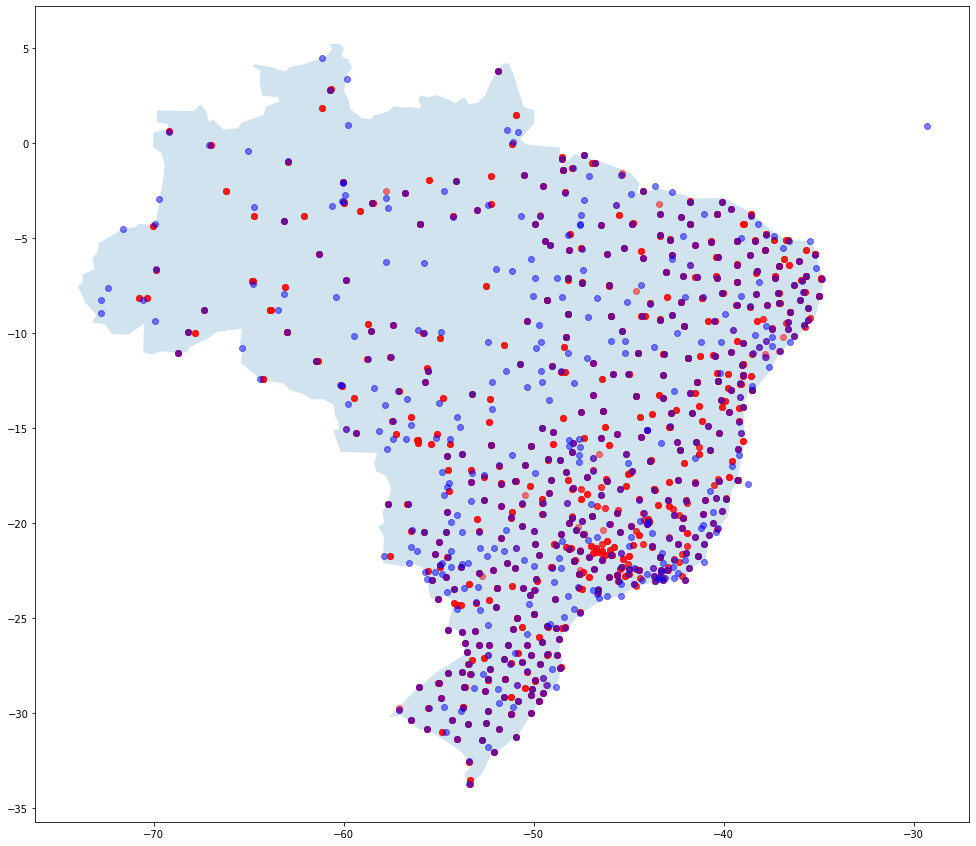

In [49]:
fig, ax = plt.subplots(figsize=(30, 15))

Brasil.plot(ax=ax, alpha=0.2)
real_stations.plot(ax=ax, alpha=0.5, color='red')
INMET.plot(ax=ax, color='blue', alpha=0.5)



In [53]:
INMET.columns

Index(['field_1', 'region', 'uf', 'estacion', 'codigo_wmo', 'lat', 'lon',
       'altitude', 'fecha_fundacion', 'path_file', 'nameFull', 'origen',
       'fechMinFile', 'fechMaxFile', 'fechMinData', 'fechMaxData',
       'periodicidad', 'actualizacion', 'activo', 'geometry'],
      dtype='object')

In [55]:
real_stations[real_stations["Active"] == True].shape

(1565, 11)

<AxesSubplot:>

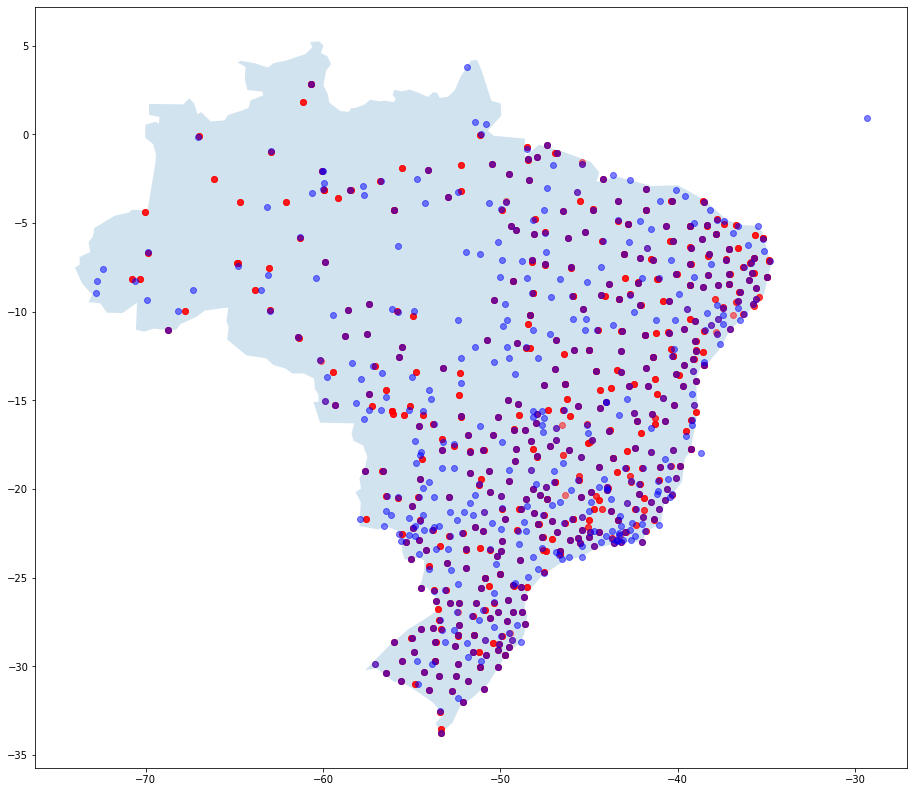

In [57]:
fig, ax = plt.subplots(figsize=(30, 14))

Brasil.plot(ax=ax, alpha=0.2)
real_stations[real_stations["Active"] == True].plot(ax=ax, alpha=0.5, color='red')
INMET[INMET["activo"] == True].plot(ax=ax, color='blue', alpha=0.5)

